In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
plt.rc('font', family='Comic Sans MS')
Dane = pd.read_csv("Pomiary.csv")
Dane

,T[C],U[mV]
0,20,452
1,95,452
2,117,449
3,122,447
4,128,442
5,133,436
6,137,435
7,141,429
8,144,422
9,147,416


C:\Users\Paulina\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in power


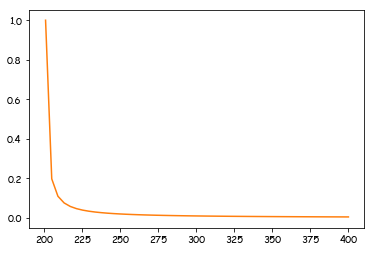

In [3]:
Teoria_T_C = 200
Teoria = np.linspace(0,200)
Teoria2 = np.linspace(201,400)
plt.plot(Teoria,(Teoria-Teoria_T_C)**1.5)
plt.plot(Teoria2,1/(Teoria2-Teoria_T_C))

In [4]:
delta_T = Dane["T[C]"]*0.005+5
delta_U = Dane["U[mV]"]*0.015+5
tabelka = np.zeros((4,32))
tabelka[0] = Dane["T[C]"]
tabelka[1] = delta_T
tabelka[2] = Dane["U[mV]"]
tabelka[3] = delta_U
print(pd.DataFrame.from_records(tabelka.T).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &       3 \\
\midrule
0  &   20.0 &  5.100 &  452.0 &  11.780 \\
1  &   95.0 &  5.475 &  452.0 &  11.780 \\
2  &  117.0 &  5.585 &  449.0 &  11.735 \\
3  &  122.0 &  5.610 &  447.0 &  11.705 \\
4  &  128.0 &  5.640 &  442.0 &  11.630 \\
5  &  133.0 &  5.665 &  436.0 &  11.540 \\
6  &  137.0 &  5.685 &  435.0 &  11.525 \\
7  &  141.0 &  5.705 &  429.0 &  11.435 \\
8  &  144.0 &  5.720 &  422.0 &  11.330 \\
9  &  147.0 &  5.735 &  416.0 &  11.240 \\
10 &  150.0 &  5.750 &  407.0 &  11.105 \\
11 &  153.0 &  5.765 &  396.0 &  10.940 \\
12 &  156.0 &  5.780 &  383.0 &  10.745 \\
13 &  159.0 &  5.795 &  361.0 &  10.415 \\
14 &  162.0 &  5.810 &  334.0 &  10.010 \\
15 &  165.0 &  5.825 &  301.0 &   9.515 \\
16 &  168.0 &  5.840 &  262.0 &   8.930 \\
17 &  170.0 &  5.850 &  221.0 &   8.315 \\
18 &  173.0 &  5.865 &  183.0 &   7.745 \\
19 &  176.0 &  5.880 &  146.0 &   7.190 \\
20 &  179.0 &  5.895 &  111.0 &   6.665 \\
21 &  183.0 &

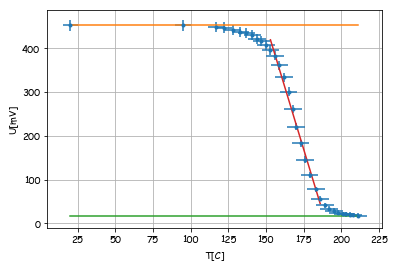

In [36]:
U_max = np.zeros((32,1)) + 452
U_min = np.zeros((32,1))+18
plt.errorbar(Dane["T[C]"],Dane["U[mV]"],delta_U,delta_T,'.')
plt.plot(Dane["T[C]"],U_max)
plt.plot(Dane["T[C]"],U_min)
parametry, kowariancja = np.polyfit(Dane["T[C]"][11:23:],Dane["U[mV]"][11:23:],1,cov=True)
# parametry_curve, kowariancja_curve = curve_fit(paramagnetyk,Dane["T[C]"][17::],Dane["U[mV]"][17::])
plt.plot(Dane["T[C]"][11:23:],Dane["T[C]"][11:23:]*parametry[0]+parametry[1])
# plt.plot(Dane["T[C]"][17::],parametry_curve[1]/(Dane["T[C]"][17::]-parametry_curve[0]))
plt.grid()
plt.ylabel("U[mV]")
plt.xlabel("T[C]")
# plt.savefig("Curie_proste.eps")

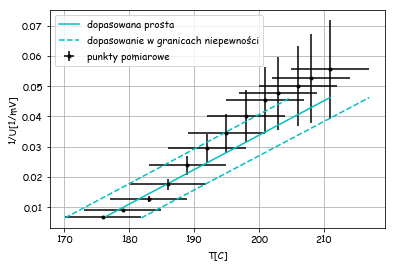

In [35]:
plt.errorbar(Dane["T[C]"][19::],1/(Dane["U[mV]"][19::]),delta_U[19::]/Dane["U[mV]"][19::]**2,delta_T[19::],\
             'k.',label='punkty pomiarowe')
prosta, D_prosta = np.polyfit(Dane["T[C]"][19::],1/(Dane["U[mV]"][19::]),1,cov=True,\
                              w=((delta_U[19::]/Dane["U[mV]"][19::]**2)**(-1)))
plt.plot(Dane["T[C]"][19::],np.polyval(prosta,Dane["T[C]"][19::]),'c-',label='dopasowana prosta')
prosta_mniej, D_prosta_mniej = np.polyfit(Dane["T[C]"][19::]-delta_T[19::],1/(Dane["U[mV]"][19::]),\
                                          1,cov=True,w=((delta_U[19::]/Dane["U[mV]"][19::]**2)**(-1)))
plt.plot(Dane["T[C]"][19::]-delta_T[19::],np.polyval(prosta_mniej,Dane["T[C]"][19::]-delta_T[19::]),\
         'c--',label='dopasowanie w granicach niepewności')
prosta_wiecej, D_prosta_wiecej = np.polyfit(Dane["T[C]"][19::]+delta_T[19::],1/(Dane["U[mV]"][19::]),\
                                          1,cov=True,w=((delta_U[19::]/Dane["U[mV]"][19::]**2)**(-1)))
plt.plot(Dane["T[C]"][19::]+delta_T[19::],np.polyval(prosta_wiecej,Dane["T[C]"][19::]+delta_T[19::]),\
         'c--')
plt.legend(loc='upper left')
plt.grid()
plt.ylabel("1/U[1/mV]")
plt.xlabel("T[C]")
# plt.savefig("Curie_odwrotnosc.eps")

C:\Users\Paulina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2964: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for (thisx, thiserr)


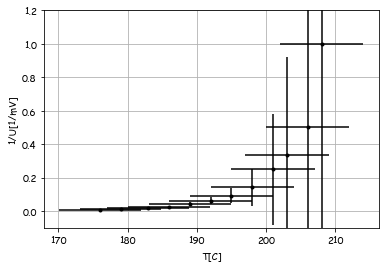

In [37]:
plt.errorbar(Dane["T[C]"][19::],1/(Dane["U[mV]"][19::]-18),delta_U[19::]/(Dane["U[mV]"]-18)[19::]**2,delta_T[19::],'k.')
plt.grid()
plt.ylabel("1/U[1/mV]")
plt.xlabel("T[C]")
plt.ylim(-0.1,1.2)
plt.savefig("Curie_odjete.eps")

In [8]:
dataframe = pd.DataFrame()
dataframe[r'T[$^\circ $C]'] = Dane['T[C]'][17::]
dataframe[r'$\Delta T [^\circ C]$'] = delta_T[17::]
dataframe[r'$\frac{1}{U}[\frac{1}{mV}]$'] = Dane['U[mV]'][17::]
dataframe[r'$\Delta \frac{1}{U}[\frac{1}{mV}]$'] = delta_U[17::]/Dane["U[mV]"][17::]**2
dataframe[r'$\frac{1}{U-U_{min}}[\frac{1}{mV}]$'] = 1/(Dane["U[mV]"][17::]-18)
dataframe[r'$\Delta \frac{1}{U-U_{min}}[\frac{1}{mV}]$'] = delta_U[17::]/(Dane["U[mV]"]-18)[17::]**2
pd.set_option('precision',2)
print(dataframe.to_latex(escape=False))

\begin{tabular}{lrrrrrr}
\toprule
{} &  T[$^\circ $C] &  $\Delta T [^\circ C]$ &  $\frac{1}{U}[\frac{1}{mV}]$ &  $\Delta \frac{1}{U}[\frac{1}{mV}]$ &  $\frac{1}{U-U_{min}}[\frac{1}{mV}]$ &  $\Delta \frac{1}{U-U_{min}}[\frac{1}{mV}]$ \\
\midrule
17 &            170 &                   5.85 &                          221 &                            1.70e-04 &                             4.93e-03 &                                    2.02e-04 \\
18 &            173 &                   5.87 &                          183 &                            2.31e-04 &                             6.06e-03 &                                    2.84e-04 \\
19 &            176 &                   5.88 &                          146 &                            3.37e-04 &                             7.81e-03 &                                    4.39e-04 \\
20 &            179 &                   5.89 &                          111 &                            5.41e-04 &                             1.08e